In [1]:
!apt-get update
!apt install -y git

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [2475 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2170 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2045 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1402 kB]
Fetched 8343 kB in 2s (5300 kB/s)                        
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  git-man libasn1-8-heimdal libcurl3-gnutls liberror-perl libexpat1
  libgdbm-compat4 libgdbm5 libgssapi3-heimdal libhc

In [5]:
!git clone https://gitlab.com/AdaptText/AdaptTextLib.git

Cloning into 'AdaptTextLib'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 682 (delta 28), reused 50 (delta 28), pack-reused 632
Receiving objects: 100% (682/682), 1.17 MiB | 3.07 MiB/s, done.
Resolving deltas: 100% (462/462), done.


In [6]:
!cd AdaptTextLib && bash setup.sh

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease       
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease         
Hit:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
3 packages can be upgraded. Run 'apt list --upgradable' to see them.
     |████████████████████████████████| 1.2 MB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 51.0 MB/s eta 0:00:01
     |████████████████████████████████| 131 kB 43.3 MB/s eta 0:00:01
     |████████████████████████████████| 94 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 77 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 555 kB 26.5 MB/s eta 0:00:01
     |████████████████████████████████| 10.5 MB 30.2 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 34.6 MB/s eta 0:00:01
     |█████████

In [7]:
from AdaptTextLib.adapttext.adapt_text import AdaptText

lang = 'si'
app_root = "/storage"
bs = 128
splitting_ratio = 0.1
adapttext = AdaptText(lang, app_root, bs, splitting_ratio)

In [8]:
adapttext.prepare_pretrained_lm("full_si_dedup.zip")

In [ ]:
import pandas as pd

pd.set_option('display.max_colwidth', -1)
path_to_csv="sinhala-hate-speech-dataset.csv"
df = pd.read_csv(path_to_csv)

text_name = "comment"
label_name = "label"

# print(df.head())

classifierModelFWD, classifierModelBWD, ensembleModel, classes = adapttext.build_classifier(df, text_name, label_name, grad_unfreeze=True)

1    3455
0    2890
Name: label, dtype: int64


1    3109
0    2601
Name: label, dtype: int64


1    3109
0    2601
Name: label, dtype: int64


Training Forward model...
[PosixPath('/storage/data/siwiki/models/si_wt'), PosixPath('/storage/data/siwiki/models/si_wt_vocab')]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 3.63E-02


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,6.291991,5.070764,0.749665,0.250335,159.295837,00:01
1,5.555013,4.961734,0.740737,0.259263,142.841232,00:01


Better model found at epoch 0 with valid_loss value: 5.07076358795166.
Better model found at epoch 1 with valid_loss value: 4.961733818054199.


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,4.691113,5.100695,0.756696,0.243304,164.135956,00:01
1,4.663391,5.054572,0.752344,0.247656,156.737457,00:01
2,4.722121,5.130323,0.753795,0.246205,169.071716,00:01
3,4.657380,5.083018,0.743973,0.256027,161.260056,00:01
4,4.506981,5.117244,0.741406,0.258594,166.874863,00:01
5,4.222658,5.232908,0.752009,0.247991,187.336746,00:01
6,3.861935,5.366682,0.759933,0.240067,214.151047,00:01
7,3.525296,5.414053,0.762165,0.237835,224.539810,00:01


Better model found at epoch 0 with valid_loss value: 5.10069465637207.
Better model found at epoch 1 with valid_loss value: 5.054572105407715.
Epoch 2: reducing lr to 0.03706331820644839
Epoch 3: reducing lr to 0.03080009521303026
Epoch 4: reducing lr to 0.021021830884493373
Epoch 5: reducing lr to 0.010677607079237388
Epoch 6: reducing lr to 0.0028871965645291793


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-02
Min loss divided by 10: 9.12E-02


epoch,train_loss,valid_loss,accuracy,time
0,0.397745,0.343531,0.844095,00:05
1,0.392742,0.339653,0.844095,00:04
2,0.352185,0.342219,0.858268,00:05
3,0.355620,0.334810,0.850394,00:05
4,0.353744,0.372553,0.837795,00:05
5,0.311361,0.351015,0.850394,00:05
6,0.300409,0.326919,0.858268,00:05
7,0.290208,0.353639,0.836220,00:05
8,0.261730,0.341045,0.834646,00:05
9,0.250792,0.339202,0.842520,00:05


Better model found at epoch 0 with valid_loss value: 0.3435313403606415.
Better model found at epoch 1 with valid_loss value: 0.3396526873111725.
Epoch 2: reducing lr to 0.014275336166413233
Better model found at epoch 3 with valid_loss value: 0.3348103165626526.
Epoch 4: reducing lr to 0.014217214783975994
Epoch 5: reducing lr to 0.012366841482104615
Better model found at epoch 6 with valid_loss value: 0.3269185721874237.
Epoch 7: reducing lr to 0.007046214403364543
Epoch 8: reducing lr to 0.004310773298723598
Epoch 9: reducing lr to 0.0020326163163230434


The accuracy is 0.8582677245140076 %.
Gradual Unfreezing..


epoch,train_loss,valid_loss,accuracy,time
0,0.302499,0.385596,0.826772,00:06
1,0.316775,0.357815,0.845669,00:06
2,0.286738,0.362692,0.840945,00:05
3,0.240674,0.342137,0.856693,00:05
4,0.180507,0.428109,0.855118,00:06
5,0.114374,0.461920,0.845669,00:05
6,0.083204,0.487788,0.848819,00:05
7,0.069502,0.464346,0.848819,00:05


Better model found at epoch 0 with valid_loss value: 0.38559550046920776.
Better model found at epoch 1 with valid_loss value: 0.3578149378299713.
Epoch 2: reducing lr to 0.014814557411419963
Better model found at epoch 3 with valid_loss value: 0.3421369194984436.
Epoch 4: reducing lr to 0.008472688505368479
Epoch 5: reducing lr to 0.00431334739528111
Epoch 6: reducing lr to 0.0011678440677431587


epoch,train_loss,valid_loss,accuracy,time
0,0.240479,0.414837,0.840945,00:07
1,0.337641,0.312294,0.872441,00:07
2,0.319543,0.332069,0.856693,00:07
3,0.241737,0.349485,0.851969,00:07
4,0.132363,0.393377,0.862992,00:07
5,0.064624,0.404774,0.872441,00:07


Better model found at epoch 0 with valid_loss value: 0.414837121963501.
Better model found at epoch 1 with valid_loss value: 0.31229400634765625.
Epoch 2: reducing lr to 0.012366841482104615
Epoch 3: reducing lr to 0.007046214403364543
Epoch 4: reducing lr to 0.0020326163163230434
Completely Unfreezing..


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 7.59E-06


epoch,train_loss,valid_loss,accuracy,time
0,0.258056,0.325631,0.856693,00:10
1,0.252955,0.322991,0.855118,00:10
2,0.245397,0.332548,0.848819,00:10
3,0.240238,0.317897,0.866142,00:11
4,0.251874,0.325871,0.848819,00:10
5,0.249238,0.327940,0.847244,00:11


Better model found at epoch 0 with valid_loss value: 0.3256308138370514.
Better model found at epoch 1 with valid_loss value: 0.32299113273620605.
Better model found at epoch 3 with valid_loss value: 0.31789684295654297.


epoch,train_loss,valid_loss,accuracy,time
0,0.261062,0.341202,0.839370,00:11
1,0.250317,0.320670,0.858268,00:11
2,0.256305,0.324732,0.853543,00:11
3,0.245829,0.323551,0.853543,00:10
4,0.258871,0.325912,0.856693,00:10
5,0.246050,0.320526,0.858268,00:10


Better model found at epoch 0 with valid_loss value: 0.34120234847068787.
Better model found at epoch 1 with valid_loss value: 0.32066959142684937.
Better model found at epoch 5 with valid_loss value: 0.3205264210700989.


The accuracy is 0.8582677245140076 %.
Training Backward model...
[PosixPath('/storage/data/siwiki/models/si_wt_bwd'), PosixPath('/storage/data/siwiki/models/si_wt_vocab_bwd')]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 6.31E-02


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,6.246778,5.095258,0.759598,0.240402,163.245911,00:01
1,5.562694,4.975162,0.750781,0.249219,144.772202,00:01


Better model found at epoch 0 with valid_loss value: 5.095257759094238.
Better model found at epoch 1 with valid_loss value: 4.975161552429199.


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,4.725211,5.068071,0.760268,0.239732,158.867722,00:01
1,4.720630,5.007297,0.754129,0.245871,149.500031,00:01
2,4.690362,5.025671,0.749777,0.250223,152.272324,00:01
3,4.611043,5.107068,0.763281,0.236719,165.185333,00:01
4,4.441374,5.160197,0.758147,0.241853,174.198730,00:01
5,4.186389,5.282738,0.769754,0.230246,196.908218,00:01
6,3.831577,5.421483,0.772768,0.227232,226.214249,00:01
7,3.501995,5.471853,0.773661,0.226339,237.900681,00:01


Better model found at epoch 0 with valid_loss value: 5.068071365356445.
Better model found at epoch 1 with valid_loss value: 5.007296562194824.
Epoch 2: reducing lr to 0.03706331820644839
Epoch 3: reducing lr to 0.03080009521303026
Epoch 4: reducing lr to 0.021021830884493373
Epoch 5: reducing lr to 0.010677607079237388
Epoch 6: reducing lr to 0.0028871965645291793


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-02
Min loss divided by 10: 5.75E-03


epoch,train_loss,valid_loss,accuracy,time
0,0.418663,0.357242,0.839370,00:05
1,0.400527,0.382637,0.804724,00:05
2,0.377725,0.331844,0.858268,00:05
3,0.379282,0.349491,0.847244,00:05
4,0.362202,0.380744,0.834646,00:05
5,0.345422,0.338800,0.850394,00:05
6,0.357358,0.356121,0.839370,00:05
7,0.347689,0.341126,0.844095,00:05
8,0.308914,0.341485,0.847244,00:05
9,0.302011,0.354474,0.833071,00:05


Better model found at epoch 0 with valid_loss value: 0.35724160075187683.
Epoch 1: reducing lr to 0.006373847414039244
Better model found at epoch 2 with valid_loss value: 0.3318437337875366.
Epoch 3: reducing lr to 0.01048589467791998
Epoch 4: reducing lr to 0.009835909507761165
Epoch 5: reducing lr to 0.008555763949765012
Epoch 6: reducing lr to 0.006822254303388455
Epoch 7: reducing lr to 0.004874789351982685
Epoch 8: reducing lr to 0.0029823264766673727
Epoch 9: reducing lr to 0.0014062269196274428


The accuracy is 0.8582677245140076 %.
Gradual Unfreezing..


epoch,train_loss,valid_loss,accuracy,time
0,0.371660,0.361934,0.833071,00:06
1,0.353298,0.393145,0.793701,00:06
2,0.325670,0.339152,0.856693,00:05
3,0.261966,0.375323,0.848819,00:05
4,0.215019,0.387340,0.850394,00:06
5,0.164205,0.414997,0.866142,00:06
6,0.118068,0.407794,0.850394,00:05
7,0.098056,0.388447,0.848819,00:05


Better model found at epoch 0 with valid_loss value: 0.3619336783885956.
Epoch 1: reducing lr to 0.009870960665575622
Better model found at epoch 2 with valid_loss value: 0.33915233612060547.
Epoch 3: reducing lr to 0.008558857306663696
Epoch 4: reducing lr to 0.005861668314962786
Epoch 5: reducing lr to 0.0029841073163879954
Epoch 6: reducing lr to 0.0008079506952686694


epoch,train_loss,valid_loss,accuracy,time
0,0.273514,0.350466,0.840945,00:07
1,0.332874,0.335661,0.851969,00:07
2,0.257199,0.309059,0.859843,00:07
3,0.181335,0.352440,0.853543,00:08
4,0.101906,0.374867,0.870866,00:07
5,0.063348,0.392519,0.861417,00:07


Better model found at epoch 0 with valid_loss value: 0.3504663407802582.
Better model found at epoch 1 with valid_loss value: 0.33566147089004517.
Better model found at epoch 2 with valid_loss value: 0.30905914306640625.
Epoch 3: reducing lr to 0.004874789351982685
Epoch 4: reducing lr to 0.0014062269196274428
Completely Unfreezing..


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 2.29E-05


epoch,train_loss,valid_loss,accuracy,time
0,0.178051,0.313187,0.861417,00:10
1,0.184925,0.308685,0.859843,00:11
2,0.173042,0.308172,0.855118,00:10
3,0.180564,0.313979,0.864567,00:11
4,0.165062,0.307380,0.859843,00:10
5,0.186784,0.304788,0.856693,00:11


Better model found at epoch 0 with valid_loss value: 0.3131866455078125.
Better model found at epoch 1 with valid_loss value: 0.3086850941181183.
Better model found at epoch 2 with valid_loss value: 0.30817246437072754.
Better model found at epoch 4 with valid_loss value: 0.3073803782463074.
Better model found at epoch 5 with valid_loss value: 0.30478790402412415.


epoch,train_loss,valid_loss,accuracy,time
0,0.185010,0.305110,0.858268,00:11
1,0.182598,0.311257,0.861417,00:11
2,0.183734,0.303337,0.859843,00:11
3,0.180780,0.307573,0.861417,00:10
4,0.185779,0.307856,0.861417,00:11
5,0.162320,0.312343,0.864567,00:10


Better model found at epoch 0 with valid_loss value: 0.3051100969314575.
Better model found at epoch 2 with valid_loss value: 0.3033372759819031.


The accuracy is 0.8598425388336182 %.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.367700,0.326272,0.095238,0.904762,00:02
1,0.327902,0.348666,0.142857,0.857143,00:02
2,0.330158,0.445349,0.190476,0.809524,00:02
3,0.335144,0.331083,0.126984,0.873016,00:02
4,0.323697,0.254373,0.126984,0.873016,00:02


Better model found at epoch 0 with valid_loss value: 0.32627198100090027.
Epoch 1: reducing lr to 0.007537179204632919
Epoch 2: reducing lr to 0.007758771448061701
Epoch 3: reducing lr to 0.006462652050719029
Better model found at epoch 4 with valid_loss value: 0.25437280535697937.


The accuracy is 0.8730158805847168 %.
The error rate is 0.1269841194152832 %.
ROC area is 0.9556541019955653


              precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.90      0.90      0.90        41

    accuracy                           0.87        63
   macro avg       0.86      0.86      0.86        63
weighted avg       0.87      0.87      0.87        63

--Mathews Correlation Coefficient--
0.720620842572062


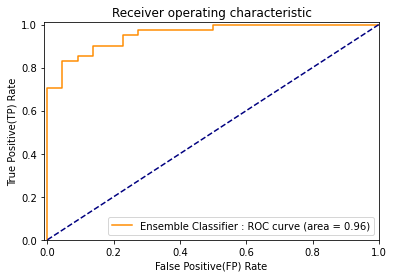

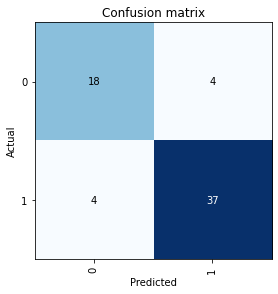

In [10]:
from AdaptTextLib.adapttext.evaluator.evaluator import Evaluator

evaluator = Evaluator()
evaluator.evaluate_ensemble(ensembleModel)